In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## About the Dataset: 
As stated above, our dataset has 10 numerical features and 8 categorical features. Taking a look at the dataset description:

Column Descriptions:
Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

##### Attribute Information: 

There are 10 numerical and 8 category attributes in the dataset. The class label can be the value of the 'Revenue' attribute. A total of 12,330 sessions were included in the dataset, of which 10,422 were negative class samples and the remaining 1908 were positive class samples that included shopping.

The terms "Administrative," "Administrative Duration," "Informational," "Informational Duration," "Product Related," and "Product Related Duration" indicate the number of various page kinds that the visitor visited during that session and the sum of the time spent on each of these page types.

When a user takes an action, such as switching between pages, the values of these features are updated in real time based on the URL information of the user's visited pages.

##### Basically, we are going to compare each features with respect to the target variable Revenue (whether or not the user completed the purchase)

In [166]:
df = pd.read_csv('online_shoppers_intention.csv')

In [167]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [168]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [169]:
df.shape

(12330, 18)

Every columns is numeric except '

In [170]:
numerical = ['Administrative','Administrative_Duration','Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical = ['OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Month','Revenue']

In [171]:
df[numerical].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [172]:
df[categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OperatingSystems  12330 non-null  int64 
 1   Browser           12330 non-null  int64 
 2   Region            12330 non-null  int64 
 3   TrafficType       12330 non-null  int64 
 4   VisitorType       12330 non-null  object
 5   Weekend           12330 non-null  bool  
 6   Month             12330 non-null  object
 7   Revenue           12330 non-null  bool  
dtypes: bool(2), int64(4), object(2)
memory usage: 602.2+ KB


In [173]:
print(df[categorical].nunique())

OperatingSystems     8
Browser             13
Region               9
TrafficType         20
VisitorType          3
Weekend              2
Month               10
Revenue              2
dtype: int64


## EDA

#### 1. Univariate Analysis
- we are going to analyse each variable.

##### 1.1. Revenue 
- target variable

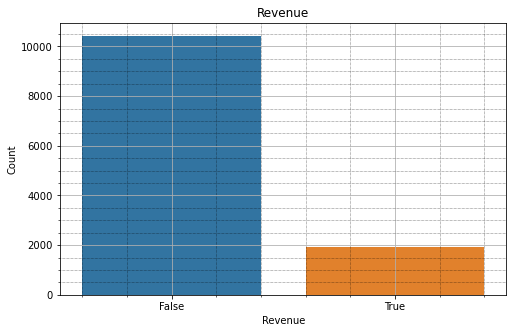

False    10422
True      1908
Name: Revenue, dtype: int64


In [174]:
sns.countplot(x='Revenue', data=df, order=df['Revenue'].value_counts().index)
plt.title('Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print(df['Revenue'].value_counts())

The dataset is imbalanced as only 15% of the visitors resulted in a revenue

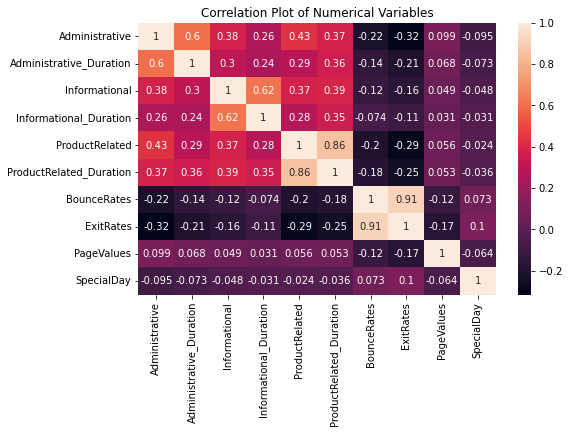

In [175]:
#correlation plot of the numerical variables
sns.heatmap(df[numerical].corr(), annot=True)
plt.title('Correlation Plot of Numerical Variables')
plt.show()

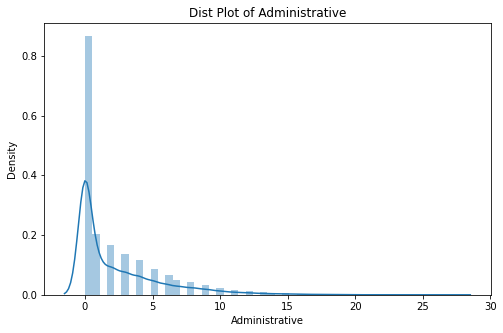

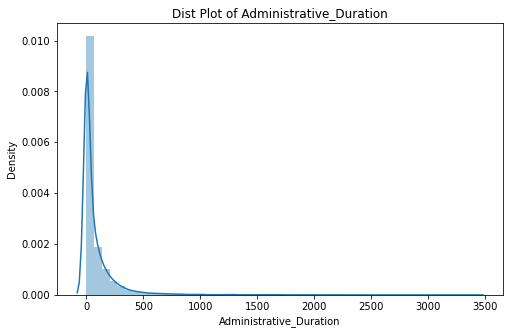

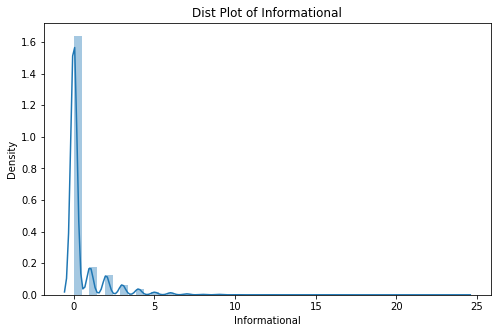

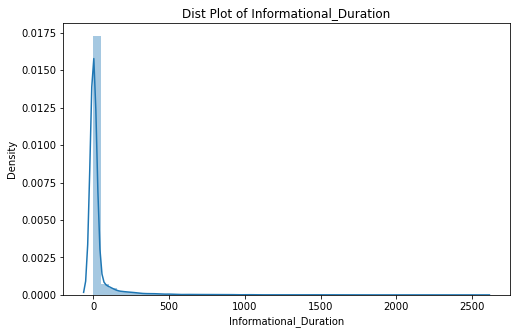

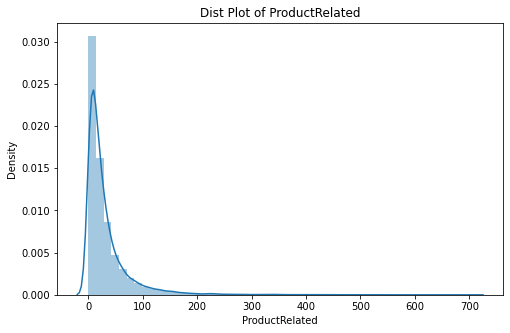

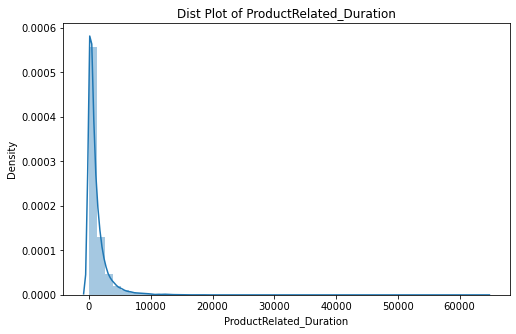

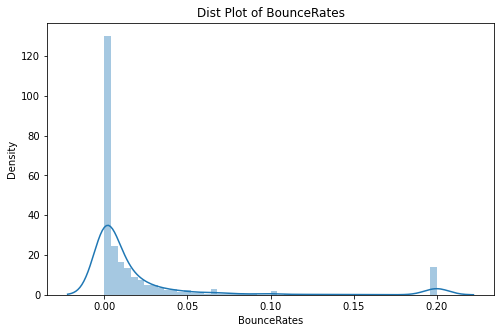

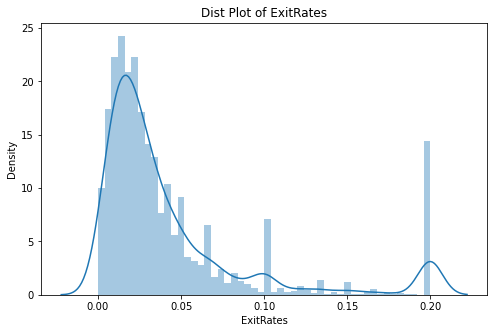

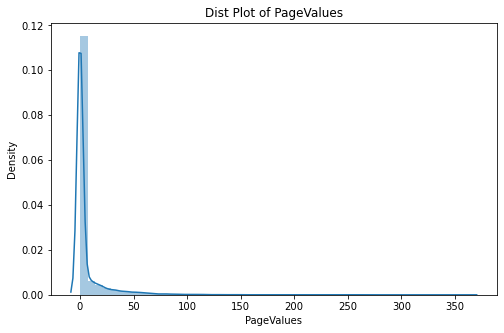

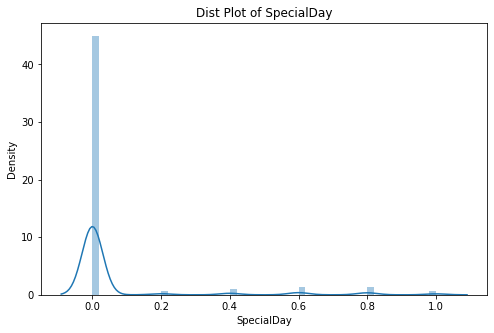

In [176]:
#dist plot of the numerical variables
for i in numerical:
    sns.distplot(df[i])
    plt.title('Dist Plot of ' + i)
    plt.xlabel(i)
    plt.show()

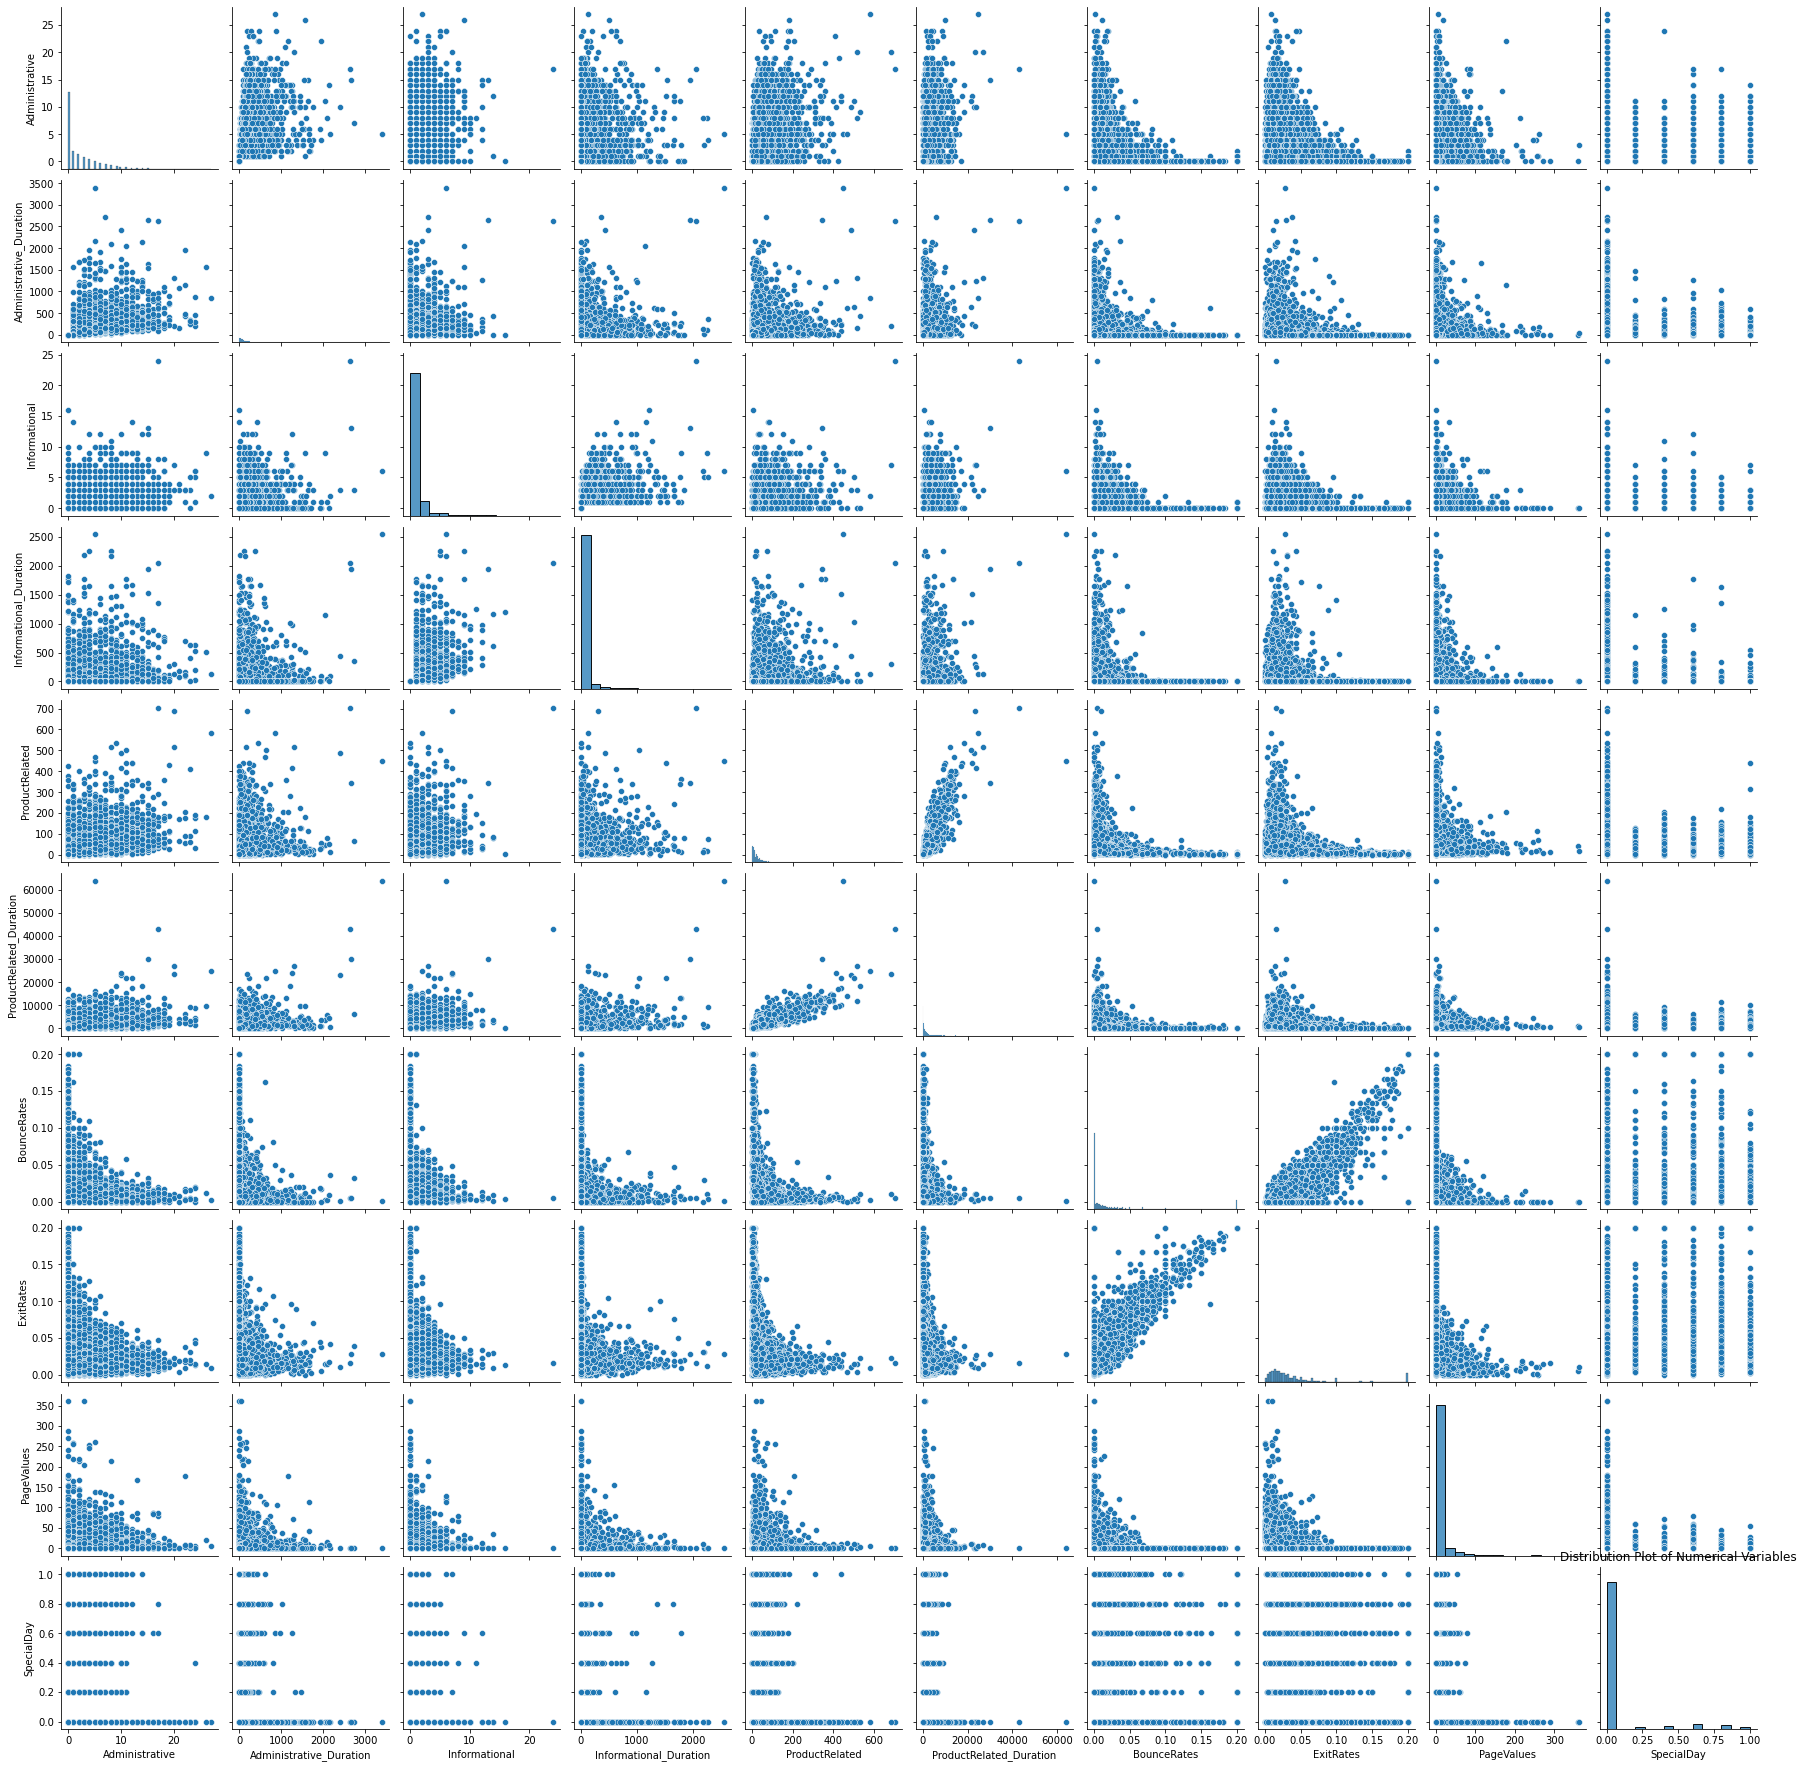

In [177]:
#distribution plot of the numerical variables
sns.pairplot(df[numerical])
plt.title('Distribution Plot of Numerical Variables')
plt.show()

##### 1.3. Browsers

Unqiue values of column Browser:
 2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


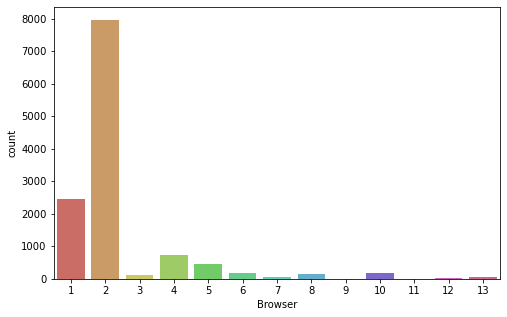

In [178]:
# checking the unique values
browser = df['Browser'].value_counts()
print("Unqiue values of column Browser:\n",browser)
# plotting the distribution
sns.countplot(x=df['Browser'], data=df, palette='hls')
plt.show()

- The plot above indicates that 90% of the user are in top 3 browesers.

##### 1.4. Operating Systems


Unique values column in Operating Systems:
 2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


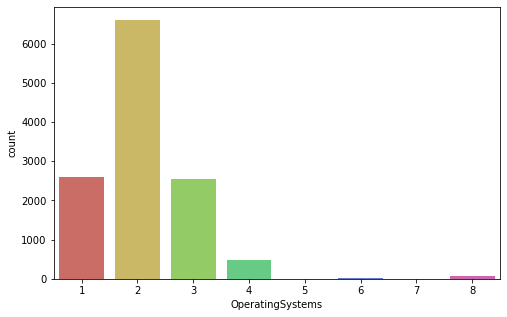

In [179]:
# checking the unique values
os = df['OperatingSystems'].value_counts()
print("Unique values column in Operating Systems:\n",os)
# plotting the distribution of each unique value
sns.countplot(x=df['OperatingSystems'], data=df, palette='hls')
plt.show()


- This indicates that the top 3 columns cover 90% of the dataset.

##### 1.5. Month 

Unique values column in Month:
 May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


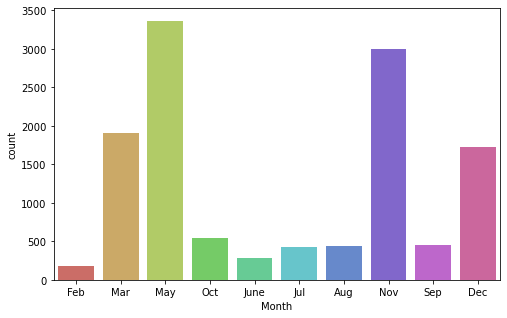

In [180]:
# checking the unique values
month = df['Month'].value_counts()
print("Unique values column in Month:\n",month )
# plotting the distribution of each unique value
sns.countplot(x=df['Month'], data=df, palette='hls')
plt.show()


- May and Nov are the peak shopping months.

##### 1.6. Visitor Type

Unique values column in VisitorType:
 Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


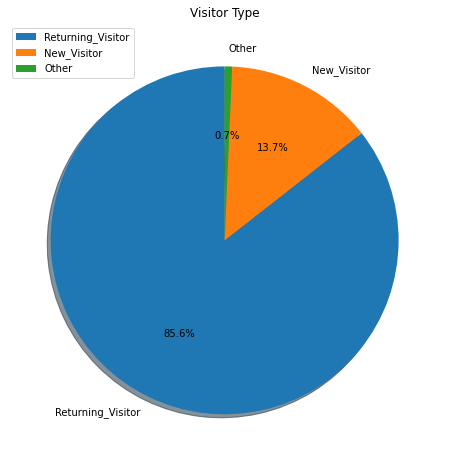

In [181]:
# checking the unique values
print("Unique values column in VisitorType:\n",df['VisitorType'].value_counts())
plt.figure(figsize=(8,8))
pie = df['VisitorType'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
pie.figure.patch.set_facecolor('white')
plt.title('Visitor Type')
plt.ylabel('')
plt.legend(loc='best')
plt.show()


- The plot above indicates that more than 80% are the returning visitors.

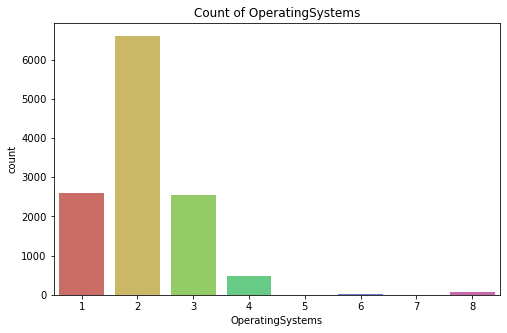

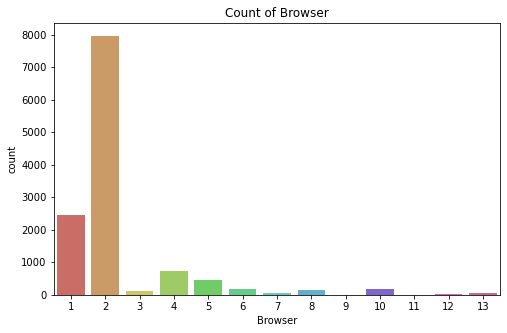

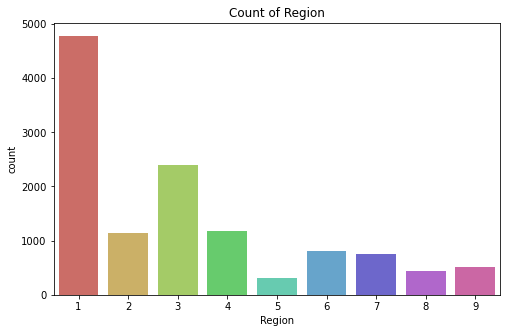

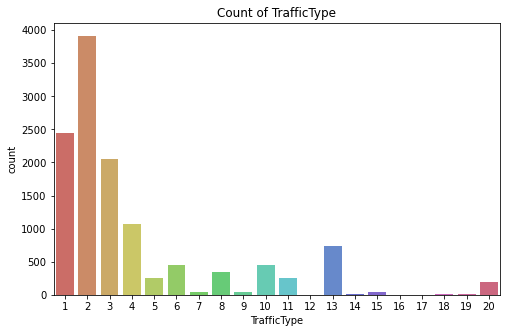

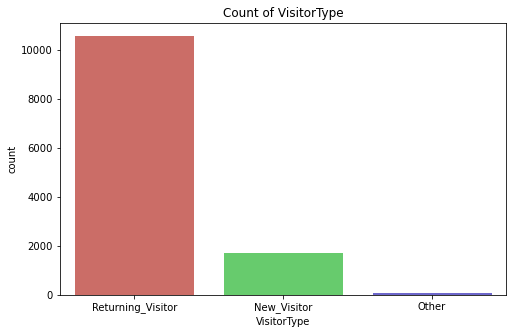

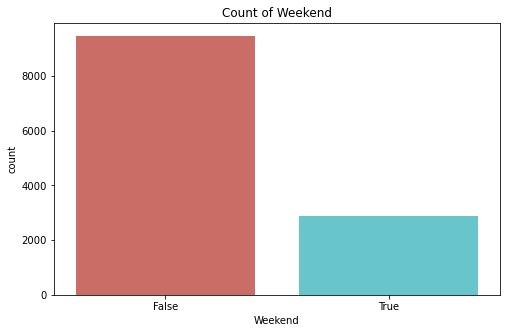

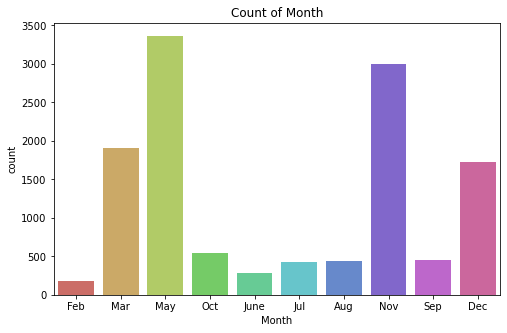

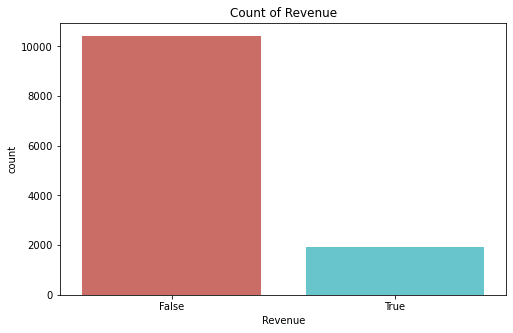

In [182]:
#subplot of the categorical variables
for i in categorical:
    sns.countplot(x=i, data=df, palette='hls')
    plt.title('Count of ' + i)
    plt.xlabel(i)
    plt.show()

In [183]:
df['PageValues'].skew()

6.382964248998133

In [184]:
df['PageValues'].skew().plot()

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [ ]:
numerical

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

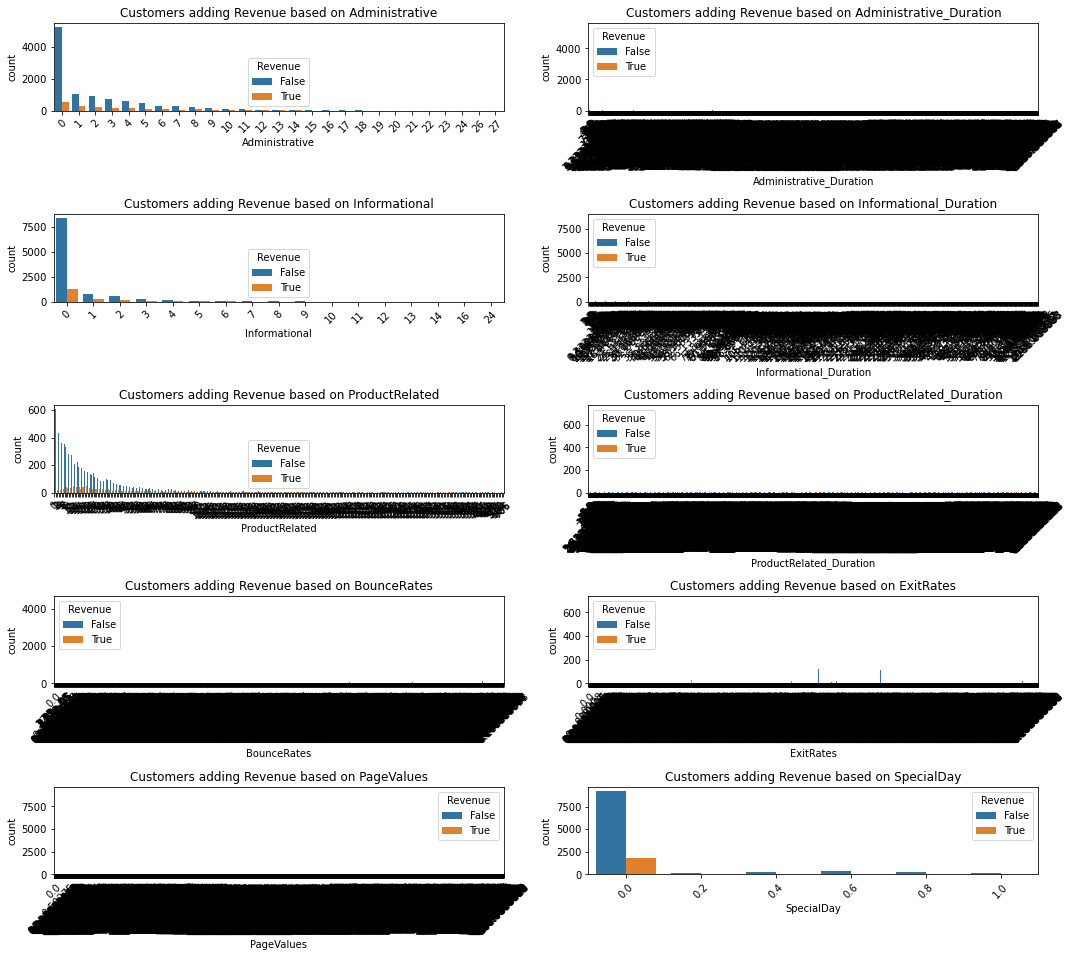

In [ ]:
column1l=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']
plt.figure(figsize=(15,15))
plot_number = 0
for i in column1l:
    plot_number = plot_number + 1
    ax = plt.subplot(6, 2, plot_number,adjustable='datalim')
    sns.countplot(df[i],hue=df['Revenue'])
    ax.set_title('Customers adding Revenue based on '+ i,fontdict=None)
    plt.xticks(rotation=45)
    plt.tight_layout()

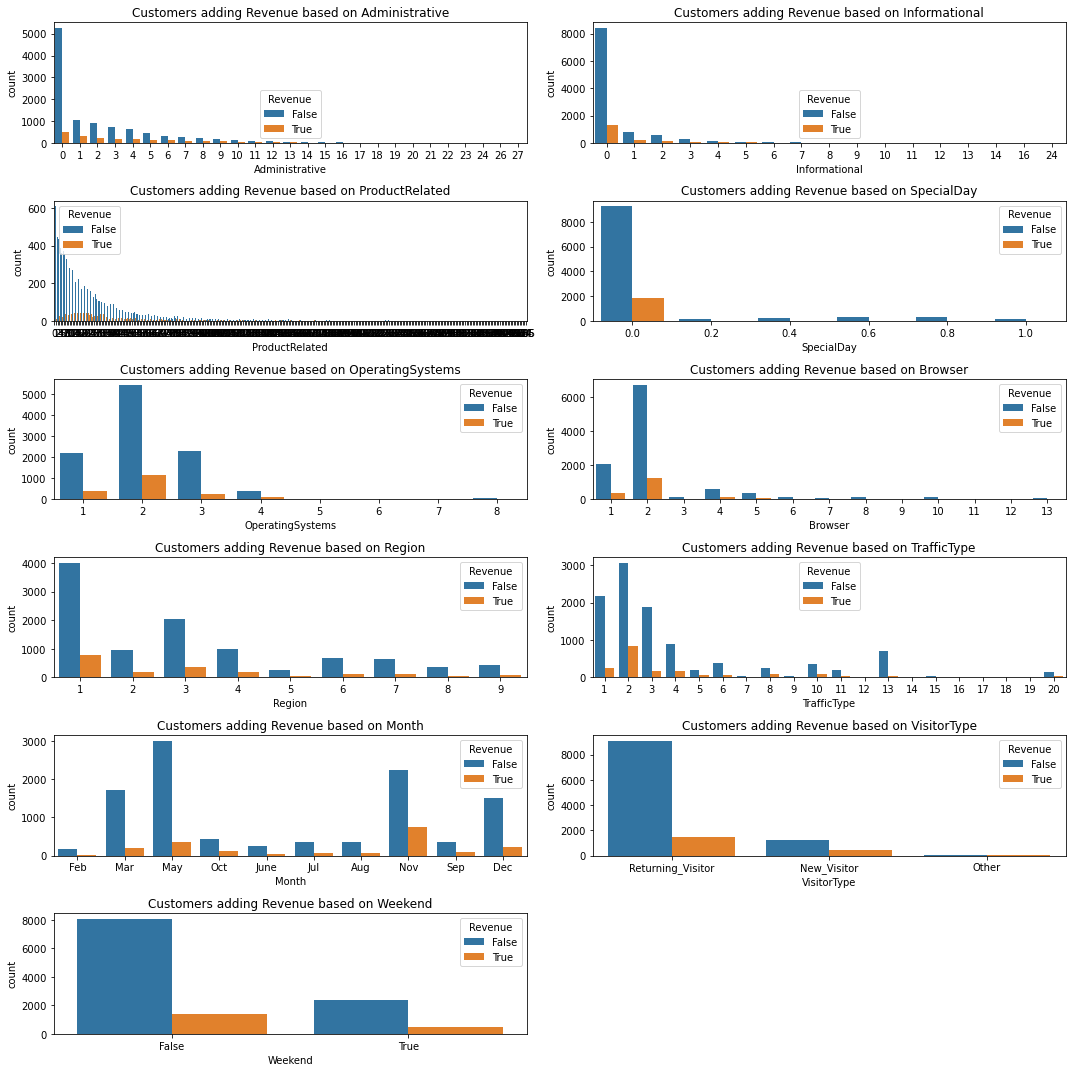

In [ ]:
column1l=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Month','VisitorType','Weekend']    
plt.figure(figsize=(15,15))
plot_number = 0
for i in column1l:
    plot_number = plot_number + 1
    ax = plt.subplot(6, 2, plot_number,adjustable='datalim')
    sns.countplot(df[i],hue=df['Revenue'])
    ax.set_title('Customers adding Revenue based on '+ i,fontdict=None)
    plt.xticks(rotation=45)
    plt.tight_layout()

#### Statistical Test

we will performm statistical test in two parts:
1. categorical columns vs target column (revenue)
2. numerical columns vs target column (revenue)

In [ ]:
categoricals =['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']

#### 1. Categorical columns vs target column (revenue)

##### 1.1. Chi-squared test

A chi-squared test, also written as χ² test, is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test and variants thereof.

###### chi2_contingency
Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence; see scipy.stats.contingency.expected_freq. The number of degrees of freedom is (expressed using numpy functions and attributes):

dof = observed.size - sum(observed.shape) + observed.ndim - 1

In [ ]:
# importing the libraries
#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# check wheather Revenue is influenced by categorical column
# Null Hypopthesis, H0 = proportion of revenue accross the category is same
# Alternative Hypothesis, H1 = proportion of revenue at least in two category is different
scol = []
spval = []
ss = []
for n in categoricals:
    scol.append(n)
    cp = chi2_contingency(pd.crosstab(df[n], df['Revenue']))[1]
    spval.append(round(cp, 4))
    if cp < 0.05:
        # rejects Null Hypothesis
        ss.append('*') # significant
    else:
        # Accept Null Hypothesis
        ss.append('**') # not significant

In [ ]:
pd.DataFrame({'Feature': scol, 'P-Value': spval, 'Significance': ss})

,Feature,P-Value,Significance
0,Administrative,0.0000,*
1,Informational,0.0000,*
2,ProductRelated,0.0000,*
3,Month,0.0000,*
4,OperatingSystems,0.0000,*
5,Browser,0.0061,*
6,Region,0.3214,**
7,TrafficType,0.0000,*
8,VisitorType,0.0000,*
9,Weekend,0.0013,*


#### 2. numerical columns vs target column (revenue)

In [ ]:
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']

##### Shapiro-Wilk test

The null hypothesis for the Shapiro-Wilk test is that a variable is normally distributed in some population. A different way to say the same is that a variable’s values are a simple random sample from a normal distribution. As a rule of thumb, we reject the null hypothesis if p < 0.05.

In [ ]:
# Two-Sample T-test
tcol = []
tpval = []
ts = []
for n in numerical_columns:
    tcol.append(n)
    # splitting into 2 groups(Revenue = True, Revenue = False)
    g1 = df[n][df['Revenue'] == False]
    g2 = df[n][df['Revenue'] == True]
    # Test for normality(Shapiro Test)
    # H0: Data is normal
    # H1: Data is not normal
    # if p < 0.05 --- reject Null Hypothesis
    for b in [g1]:
        s, p = shapiro(b)
    for c in [g2]:
        s1, p1 = shapiro(c)
    if p > 0.05 or p1 > 0.05:
        w, lp = levene(g1, g2)
    # If doesn't pass normality or variance test, we do non-parametric Test(mannwhitneyu Test)
    if p <= 0.05 or p1 <= 0.05 or lp <= 0.05:
        ms, mp = mannwhitneyu(g1, g2)
        tpval.append(round(mp, 4))
    if mp < 0.05:
        ts.append('*')  # significant
    else:
        ts.append('**') # not significant

In [ ]:
pd.DataFrame({'Feature': tcol, 'P-Value': tpval, 'Significance': ts})

,Feature,P-Value,Significance
0,Administrative_Duration,0.0,*
1,Informational_Duration,0.0,*
2,ProductRelated_Duration,0.0,*
3,BounceRates,0.0,*
4,ExitRates,0.0,*
5,PageValues,0.0,*


##### Outliers

<AxesSubplot:>

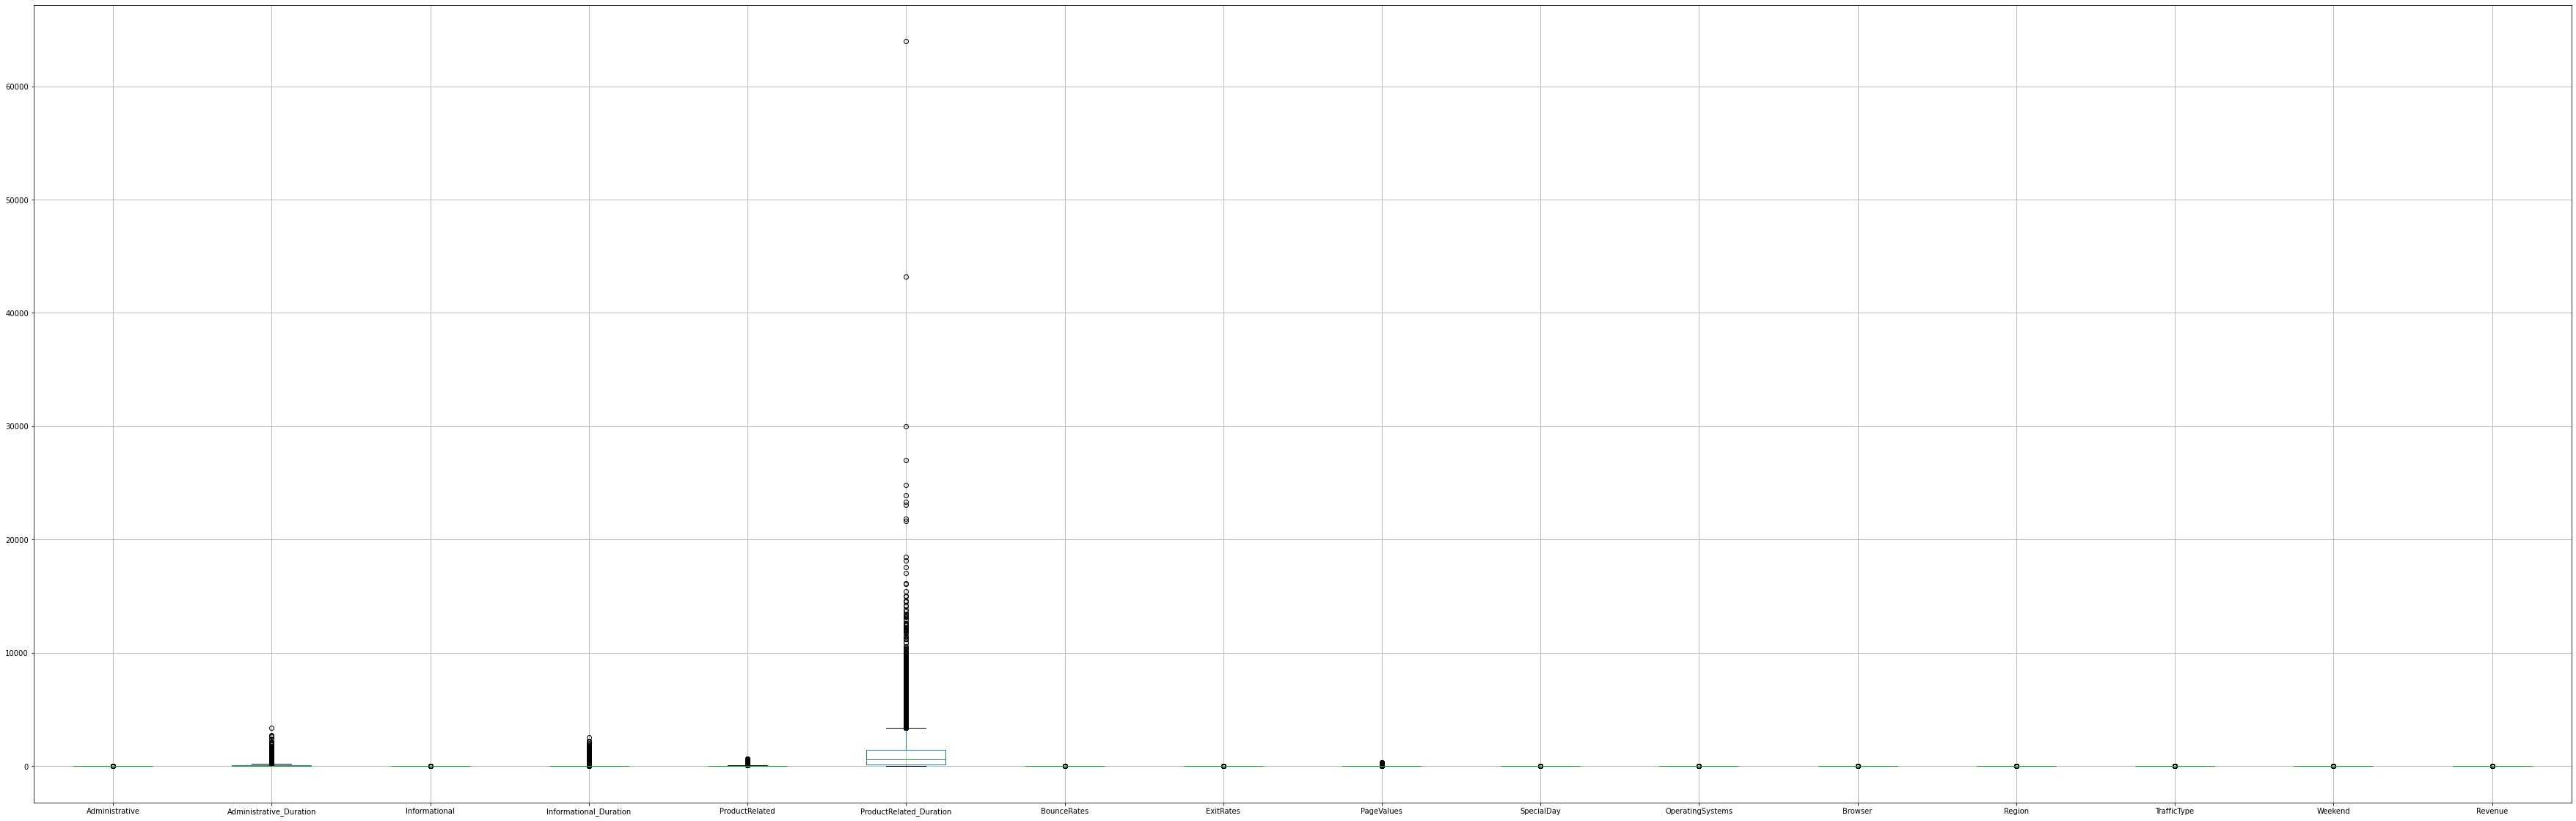

In [ ]:
plt.figure(figsize=(62, 20))
df.boxplot()

In [ ]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in numerical_columns:
    df_mean, df_std = mean(df[i]), std(df[i])
    
    # identify outliers
    cut_off = df_std * 3
    lower, upper = df_mean - cut_off, df_mean + cut_off
    print(i, ': \n')

    # identify outliers
    outliers = [x for x in df[i] if x < lower or x > upper]
    
    num_out = len(outliers)
    print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in df[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)
    

Administrative_Duration : 

Identified outliers: 232
Non-outlier observations: 12098
Percent of outliers: 1.8815896188158963 

Informational_Duration : 

Identified outliers: 230
Non-outlier observations: 12100
Percent of outliers: 1.8653690186536902 

ProductRelated_Duration : 

Identified outliers: 219
Non-outlier observations: 12111
Percent of outliers: 1.7761557177615572 

BounceRates : 

Identified outliers: 708
Non-outlier observations: 11622
Percent of outliers: 5.742092457420925 

ExitRates : 

Identified outliers: 713
Non-outlier observations: 11617
Percent of outliers: 5.78264395782644 

PageValues : 

Identified outliers: 259
Non-outlier observations: 12071
Percent of outliers: 2.1005677210056772 



In [ ]:
Outliers = pd.DataFrame({'Feature': numerical_columns, '% Of Outliers': out_per})
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending = False)
outlier_sorted

,Feature,% Of Outliers
4,ExitRates,5.782644
3,BounceRates,5.742092
5,PageValues,2.100568
0,Administrative_Duration,1.881590
1,Informational_Duration,1.865369
2,ProductRelated_Duration,1.776156


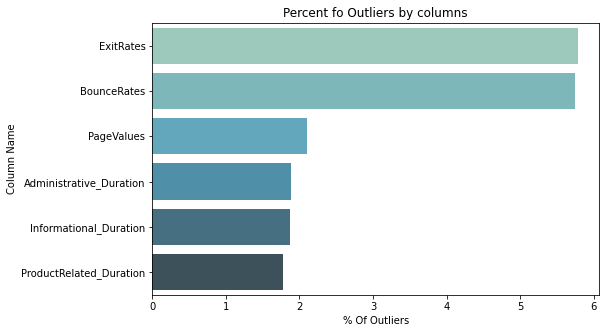

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'], palette = 'GnBu_d')
plt.title('Percent fo Outliers by columns')
plt.ylabel('Column Name')
plt.show()

In [ ]:
df2 = df.copy()
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


##### Distribution before Transformation

array([[<AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>],
       [<AxesSubplot:title={'center':'ExitRates'}>,
        <AxesSubplot:title={'center':'PageValues'}>]], dtype=object)

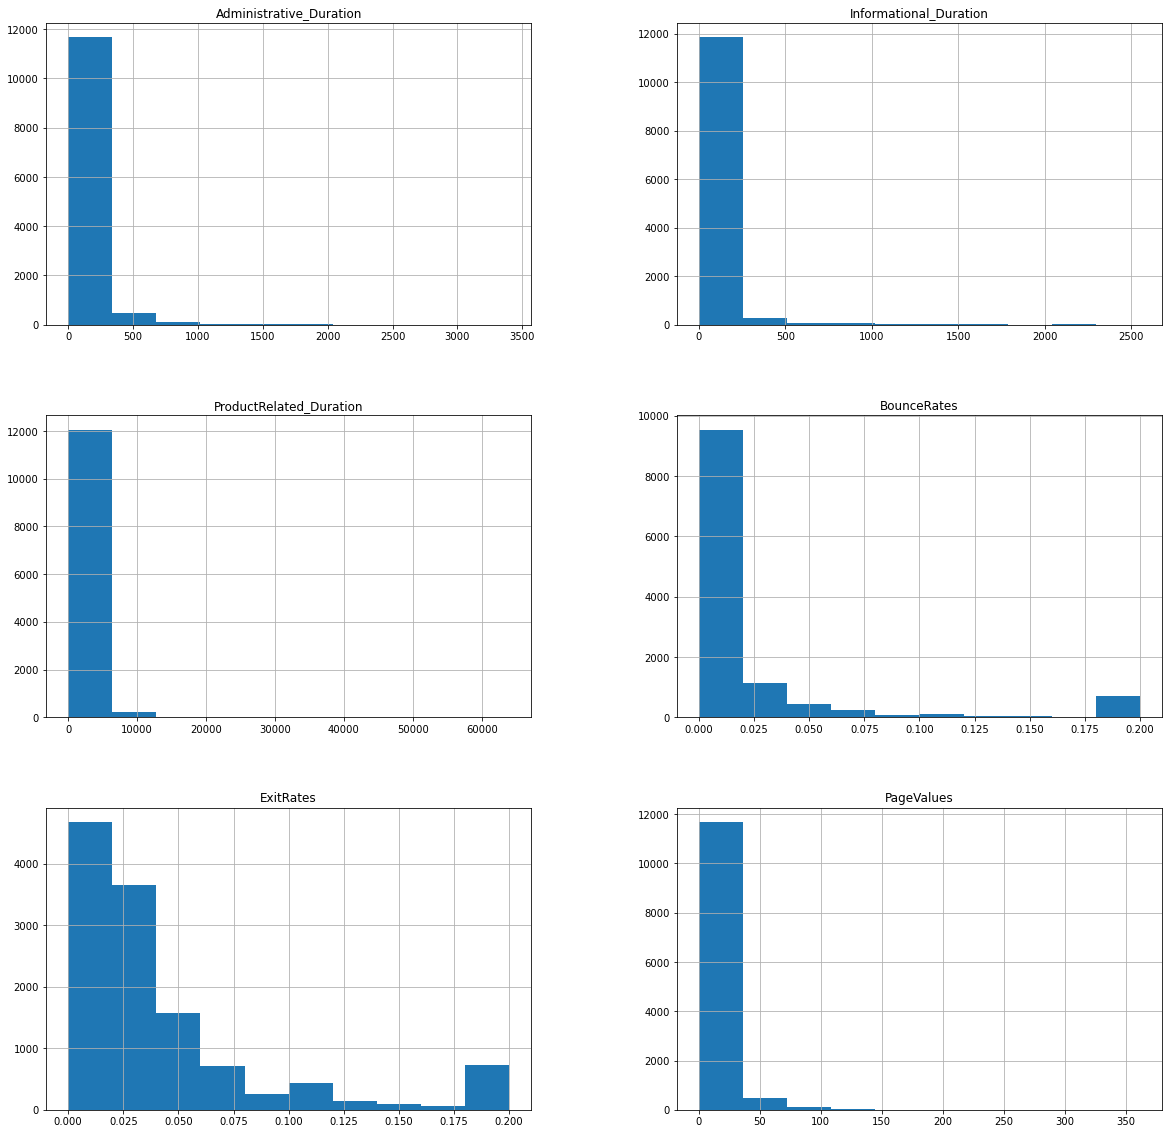

In [ ]:
df2.hist(column=numerical_columns,figsize=(20,20))

##### Transforming the columns with the best transformation technique given by above code

In [ ]:
df2['Administrative_Duration']=1/(df['Administrative_Duration']+1)
df2['Informational_Duration'],i = st.boxcox(df['Informational_Duration']+1)
df2['ProductRelated_Duration'],pd = st.boxcox(df['ProductRelated_Duration']+1)
df2['BounceRates']= df['BounceRates']**0.2 
df2['ExitRates']=df['ExitRates']**0.2 
df2['PageValues'],p = st.boxcox(df['PageValues']+1)

##### Distribution after transformation

array([[<AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>],
       [<AxesSubplot:title={'center':'ExitRates'}>,
        <AxesSubplot:title={'center':'PageValues'}>]], dtype=object)

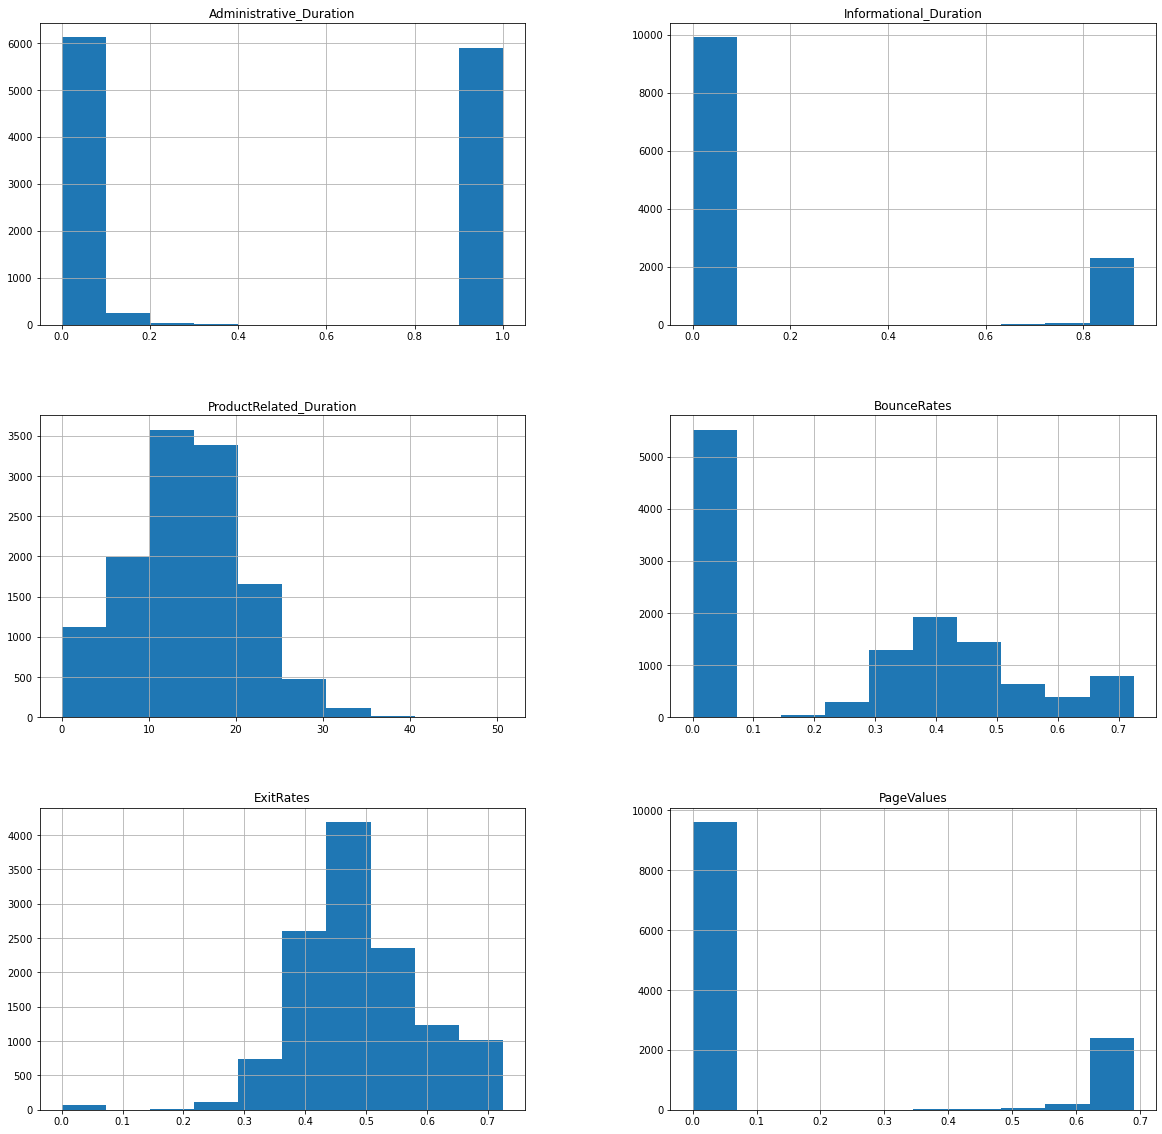

In [ ]:
df2.hist(column=numerical_columns,figsize=(20,20))

##### Converting categorical to numerical

In [ ]:
# performing label encoding to convert the weekend and revenue column
# importing necessary libraries
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# for column 'weekend'
df2['Weekend'] = le.fit_transform(df2['Weekend'])
# for column 'revenue'
df2['Revenue'] = le.fit_transform(df2['Revenue'])
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


##### Traffic

In [ ]:
df2['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [ ]:
traffic = [x for x in df2['TrafficType'].value_counts().sort_values(ascending=False).head(10).index]
traffic

[2, 1, 3, 4, 13, 10, 6, 8, 5, 11]

In [ ]:
def encoding(dataframe,variable,traffic):
    for label in traffic:
        df2[variable+'_'+str(label)] = np.where(df2[variable]==label,1,0)

In [ ]:
encoding(df2,'TrafficType',traffic)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_10,TrafficType_6,TrafficType_8,TrafficType_5,TrafficType_11
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
